# RISK RESERVE PROCESS - 1ST YEAR RESEARCH PROJECT

*Please see the Risk Reserve Model PDF for details*

In [1]:
import numpy as np
from numpy import random as rnd
import scipy.stats as ss
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
import seaborn as sns
import statistics as stats
from matplotlib.artist import Artist

## Risk reserve process simulation

In [2]:
def risk_reserve_process(u, p, T, beta, delta):
    """ Generates a Cramer-Ludberg model with R_0 = u, premiums per unit time = p, parameter of poisson distribution = beta
    parameter of exponential distribution (claim sizes) = delta, prints out a dataframe """
    
    def compound_poisson_process(u, p, T, beta, delta):
        """Generates a compound poisson process of lenght N(t) with exponential jumps"""
        
        time_claims = [n for n in np.cumsum(rnd.poisson(1/beta, rnd.poisson(beta*T)))]
        time_claims_scaled = np.array(time_claims)/time_claims[-1]*T
        time_claims_list = [int(n) for n in time_claims_scaled]
        event_times = [n for n in range(time_claims_list[-1])] +  time_claims_list
        event_times_sorted = sorted(event_times, key=int)
        total = u
        increments = []
        
        for n in range(len(event_times_sorted)):
            if event_times_sorted[n] > event_times_sorted[n-1]:
                total += p
                increments.append(total)
            else:
                total += -rnd.exponential(1/delta)
                increments.append(total)
        return event_times_sorted, increments
    
    #let x_val be the number of the week and y_val the reserve amount
    x_val, y_val = compound_poisson_process(u, p, T, beta, delta)
       
    dataframe_dict = { 'x_val' : x_val, 'y_val' : y_val } #generating data frame
    reserve_df = pd.DataFrame(dataframe_dict)                  

    return reserve_df

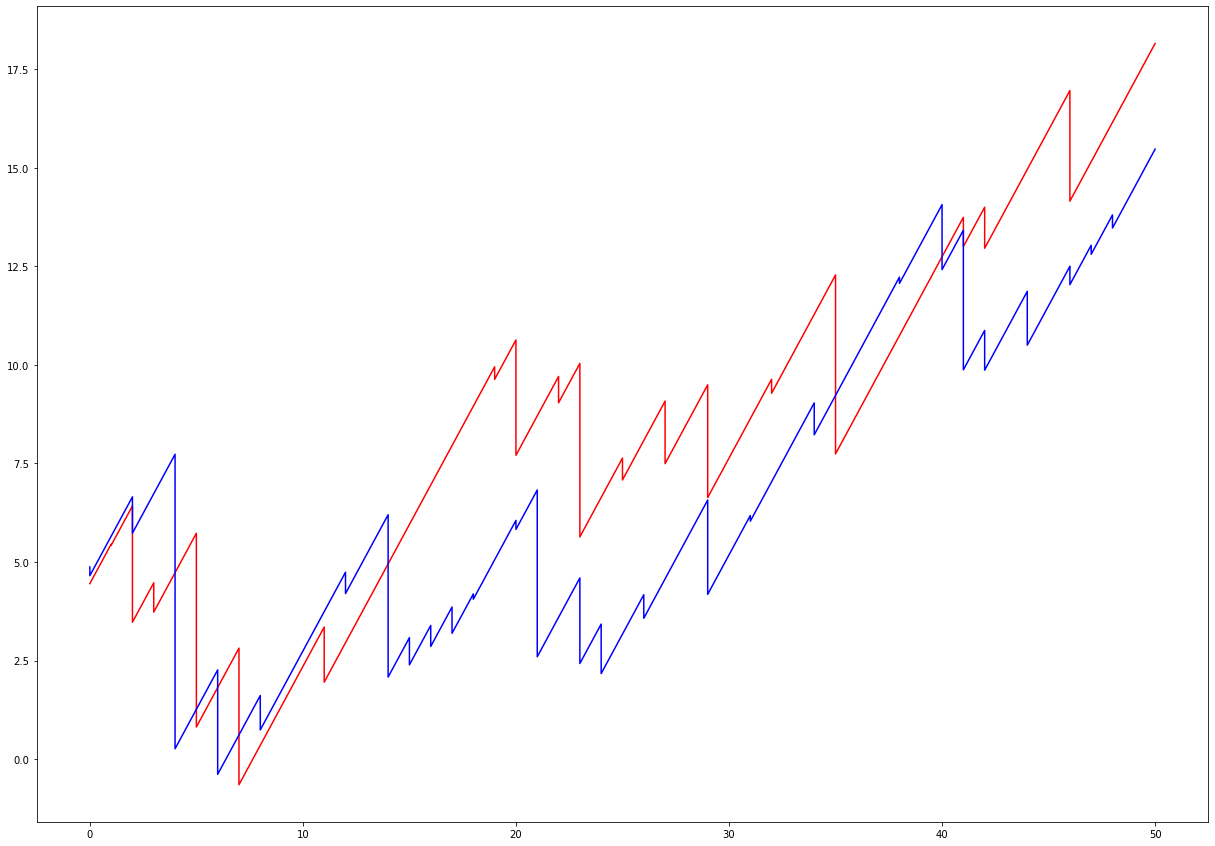

In [3]:
fig = plt.figure(figsize=(21, 15))
plt.plot('x_val', 'y_val', data=risk_reserve_process(5, 1, 50, 0.5, 0.6), color='red')
plt.plot('x_val', 'y_val', data=risk_reserve_process(5, 1, 50, 0.5, 0.6), color='blue')

## Numerical simulation of ruin probabilty through MonteCarlo methods

(0.0, 40.0)

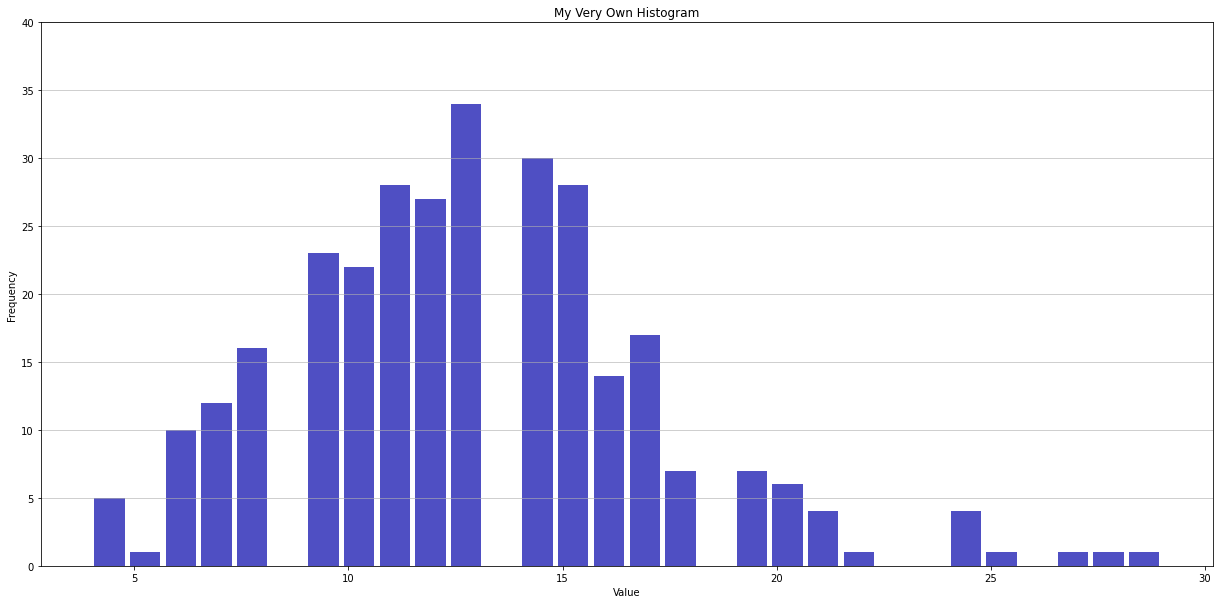

In [16]:
def ruin_function(u, p, T, beta, delta):
    df = risk_reserve_process(u, p, T, beta, delta)
    values = df['y_val']
    n = 0 
    h = 100
    
    while h>0 and n<len(values):
        
        h = values[n]
        n += 1
    
    else:
        return n
    
ruin_time = []
for n in range(300):
    q = ruin_function(100,1,1500,5,0.1)
    ruin_time.append(q)
    
d = np.array(ruin_time)
n_equal_bins = 30
bin_edges = np.linspace(start=(d.min()), stop=(d.max()), num=n_equal_bins + 1, endpoint=True)

mu = 2
sigma= 150

fig = plt.figure(figsize=(21, 10)) 

n, bins, patches = plt.hist(x=d, bins=bin_edges, color='#0504aa', alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')
#plt.text(23, 45)
maxfreq = n.max()
# Set a clean upper y-axis limit. 
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [17]:
def plot_psi_u(simulations, T, beta, delta):
    p = 1
    u_list = [5,10,15,20,35,70] #[1,1.5,2,2.5,3,3.5,4,4.5,5,8,15]#[n for n in range(1,5,0.5)]
    
    def indicator_ruin(T, beta, delta):
        
        df = risk_reserve_process(u, p, T, beta, delta)
        values = df['y_val']
        n = 0 
        h = 100
    
        while h>0 and n<len(values):
        
            h = values[n]
            n += 1
    
        else:
            if n == len(values):
                return 0
            else:
                return 1
            
    probability_list = []
    
    for u in u_list:
        
        total = 0
        
        for n in range(simulations):
            
            total += indicator_ruin(T, beta, delta)
        
        total = total / (n+1)
        probability_list.append(total)
        
    return probability_list, plt.scatter(u_list, probability_list, color='blue')
                

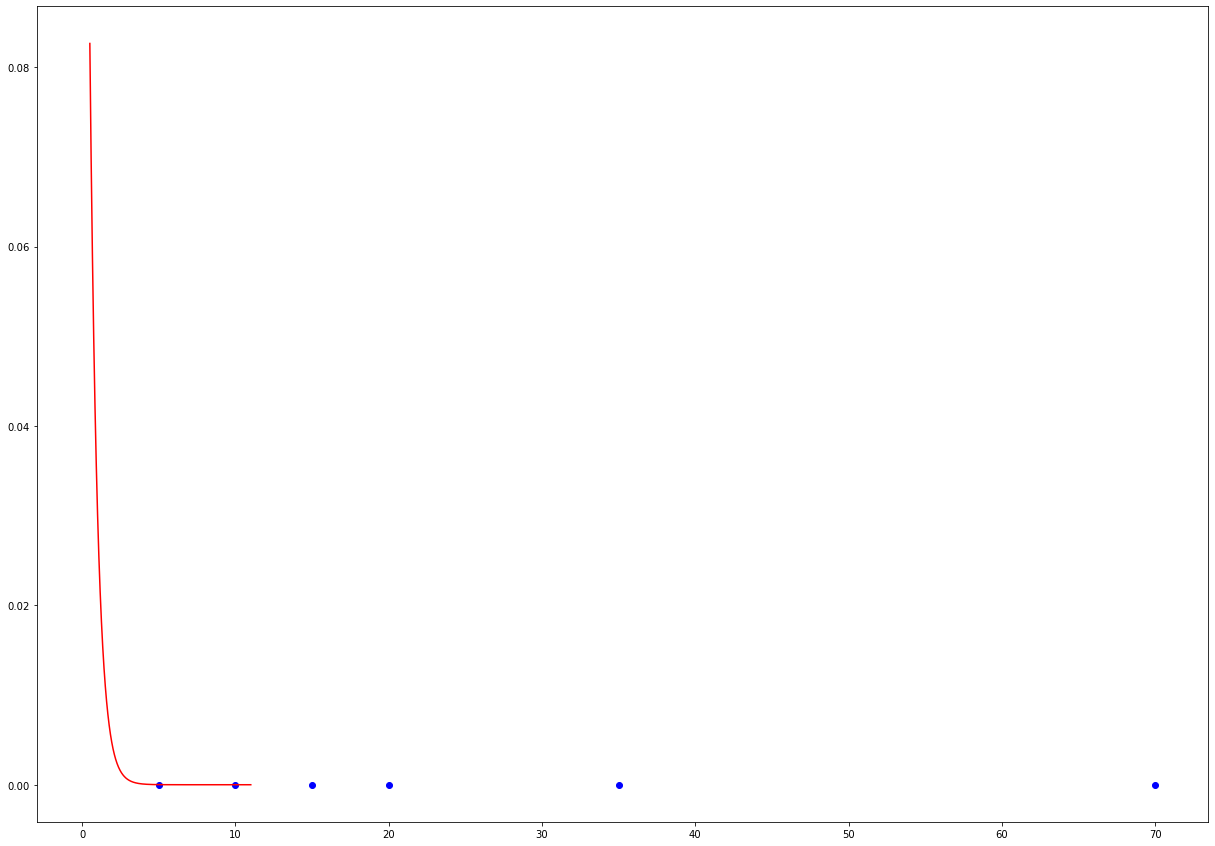

In [18]:
rnd.seed(164)
fig = plt.figure(figsize=(21, 15))
plot_psi_u(100, 1000, 2, 4)[1]
x_values = np.linspace(0.5,11,1000)
y_values = 2/4*np.exp(-2*(0.4+x_values))
plt.plot(x_values,y_values, color='red')

## Diffusion approximation using Brownian Motion

In [5]:
def brownian_motion(mu_func, sigma_func, t_end, steps, y_init):
    
    dt = float(t_end) / steps
    ts = np.arange(0, t_end, dt)
    ys = np.zeros(steps) 
    ys[0] = y_init
    
    def dW(delta_t):

        return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))
      
    for i in range(1, ts.size):
 
        t = (i-1) * dt
        y = ys[i-1]
        ys[i] = y + mu_func(t) * dt + sigma_func(t)* dW(dt)

    return ts, ys

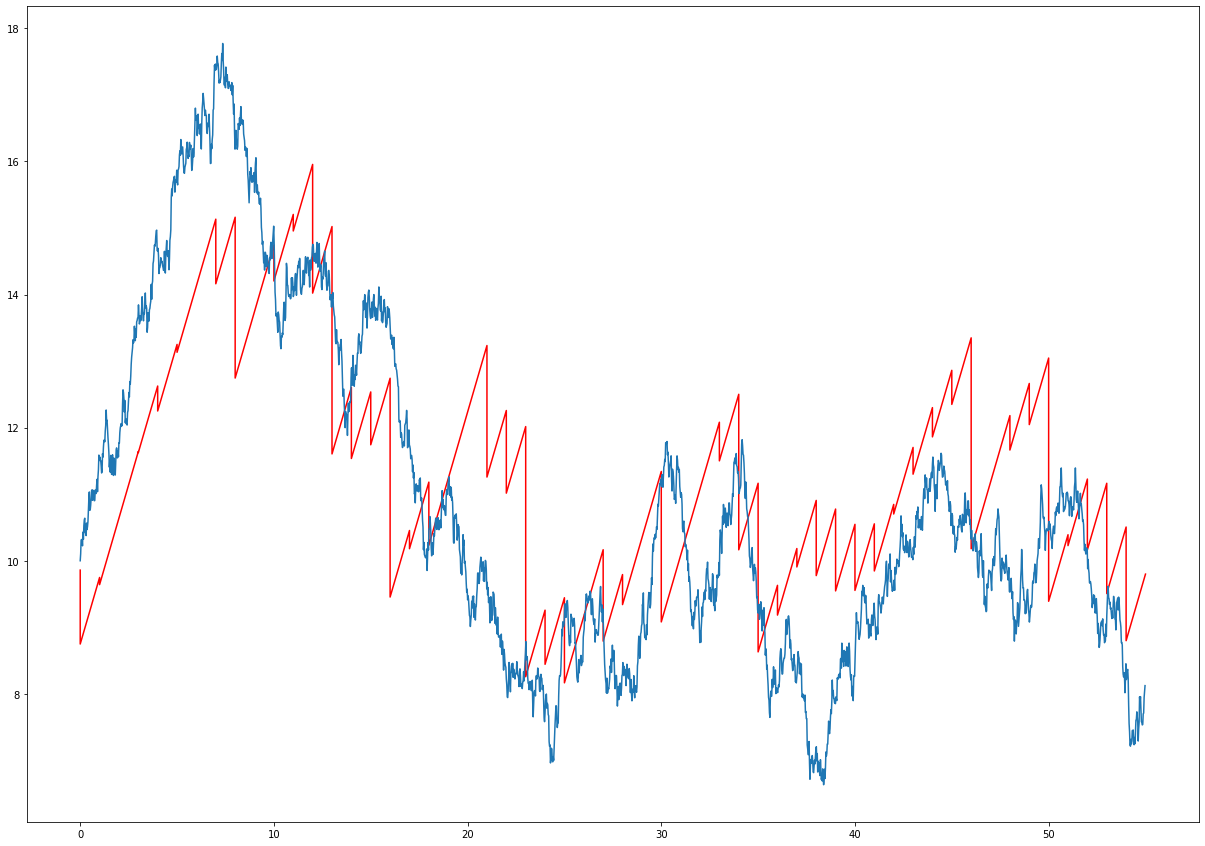

In [6]:
seed = 52 

T = 55
beta = 2
delta = 2.1
y_init = 10
u = y_init
p = 1
t_end = T
steps = rnd.poisson(beta*T)*20

fig = plt.figure(figsize=(21, 15))
rnd.seed(seed)
x_val = risk_reserve_process(u, p, T, beta, delta)['x_val']
rnd.seed(seed)
y_val = risk_reserve_process(u, p, T, beta, delta)['y_val']
arr1 = y_val*(beta/delta-p)/(beta*2/delta**2)
plt.plot(x_val,y_val,'-r')
x_value, y_value = brownian_motion(lambda t: +0.1, lambda t: 1, t_end, steps, y_init)
plt.plot(x_value, y_value)

(0.0, 50.0)

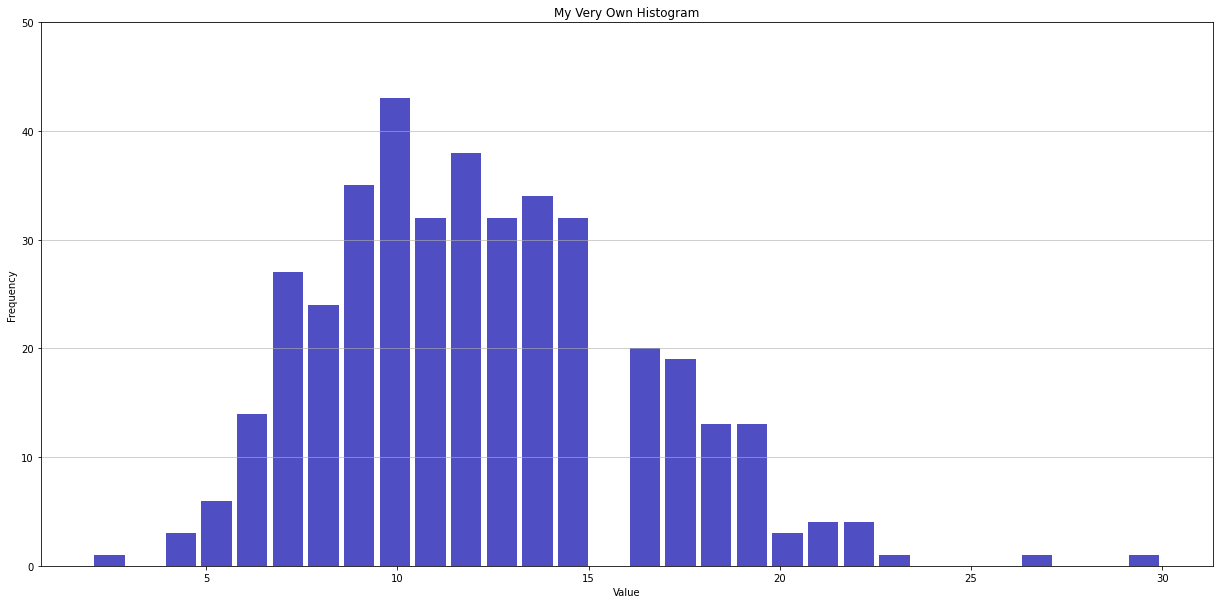